In [1]:
from torch import optim

import matplotlib.pyplot as plt

from model import *
from data_processer import *
from train import Dimension_Reduction, fit
from show_distribution import show_raw_distrib, show_atribute



In [3]:
R = read_files
data_input = R.read_json('input_data/yelp_academic_dataset_review.json')
data_train = R.read_csv('input_data/train65k.csv')
data_test = R.read_csv('input_data/test14k.csv')
wordbag_input = get_wordbag(data_input, 'input')
train_wordbag = get_intersection(wordbag_input, data_train)

intersection: 100%|██████████| 65292/65292 [00:20<00:00, 3179.64it/s]


----------------------------------------
reading pkl file finished

----------------------------------------
reading csv file finished

----------------------------------------
reading csv file finished

----------------------------------------
get wordbag done

----------------------------------------
get intersection done



In [ ]:
# path = 'outputs/all_embeddings.pkl'
wordbag_anto_syno = get_wordbag(data_train, 'as_list')
# embedding_dict_train = get_BERT_embedding(wordbag_anto_syno, path)
embedding_dict_train = R.read_pkl('input_data/train65k_embeddings.pkl')

In [ ]:
plt.title('Fasttext train cosine distance distribution')
plt.ylabel('Number of pairs')
plt.xlabel('Cosine distance')
show_raw_distrib(train_wordbag, embedding_dict_train)


In [2]:
R = read_files
data_train = R.read_csv('input_data/train65k.csv')
data_test = R.read_csv('input_data/test14k.csv')
fasttext_embedding = R.read_pkl('Triplet_data/fasttext_wiki_news_subwords.pkl')

----------------------------------------
reading csv file finished

----------------------------------------
reading csv file finished

----------------------------------------
reading pkl file finished



In [3]:
train_triplet_dataloader, val_triplet_dataloader, val_pair_dataloader,test_dataset=get_train_val_val_test\
    (data_train, data_test,fasttext_embedding)

100%|██████████| 14788/14788 [00:00<00:00, 739427.15it/s]


In [4]:
embedding_net = EmbeddingNet()
model = TripletNet(embedding_net).to(device='cuda');
loss_fn = TripletCosLoss(margin=1.)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


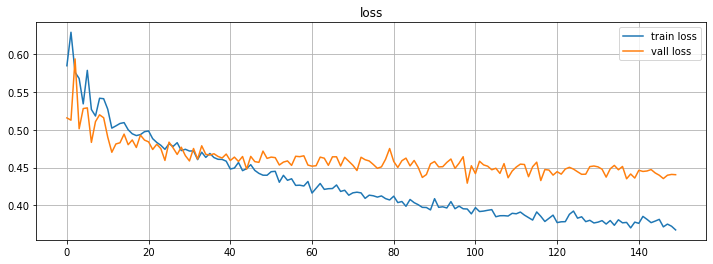

Epoch 0
Train Loss: 0.5846 | Val Loss: 0.5156

Epoch 1
Train Loss: 0.6289 | Val Loss: 0.5126

Epoch 2
Train Loss: 0.5760 | Val Loss: 0.5936

Epoch 3
Train Loss: 0.5677 | Val Loss: 0.5013

Epoch 4
Train Loss: 0.5342 | Val Loss: 0.5280

Epoch 5
Train Loss: 0.5785 | Val Loss: 0.5289

Epoch 6
Train Loss: 0.5268 | Val Loss: 0.4833

Epoch 7
Train Loss: 0.5181 | Val Loss: 0.5107

Epoch 8
Train Loss: 0.5416 | Val Loss: 0.5197

Epoch 9
Train Loss: 0.5410 | Val Loss: 0.5158

Epoch 10
Train Loss: 0.5271 | Val Loss: 0.4902

Epoch 11
Train Loss: 0.5021 | Val Loss: 0.4702

Epoch 12
Train Loss: 0.5051 | Val Loss: 0.4812

Epoch 13
Train Loss: 0.5083 | Val Loss: 0.4828

Epoch 14
Train Loss: 0.5094 | Val Loss: 0.4942

Epoch 15
Train Loss: 0.5000 | Val Loss: 0.4802

Epoch 16
Train Loss: 0.4946 | Val Loss: 0.4865

Epoch 17
Train Loss: 0.4923 | Val Loss: 0.4765

Epoch 18
Train Loss: 0.4935 | Val Loss: 0.4929

Epoch 19
Train Loss: 0.4974 | Val Loss: 0.4863

Epoch 20
Train Loss: 0.4984 | Val Loss: 0.4839

Ep

OrderedDict([('embedding_net.fc.0.weight',
              tensor([[ 14.8741, -14.2351, -14.7071,  ...,  14.9442,  13.8428,  -8.7465],
                      [ 14.5149, -13.2296,  13.9958,  ...,  13.8151,  -7.4229,  12.4048],
                      [ 14.5755,  13.2819,  14.2500,  ...,  14.2822,  13.9789,  13.7400],
                      ...,
                      [ 15.2183, -14.6691,  13.3966,  ...,  11.8194,   8.0253,   5.5619],
                      [-14.7004,  12.6653,  14.1438,  ..., -14.4694, -14.0222, -13.7630],
                      [-14.8784,  14.6728, -10.0740,  ..., -14.2096,   4.7711,   1.2090]],
                     device='cuda:0')),
             ('embedding_net.fc.0.bias',
              tensor([-13.6131,  11.1178,  13.8763,   9.3593,  12.0353,  13.9179,  -4.9145,
                       13.4513,  13.2848,   8.6142,  14.0083,  13.3525, -11.6711, -13.2004,
                       10.9584,  12.1481,  11.3753, -13.3348, -13.1780,  13.1928,  -9.2318,
                       13.7362, 

In [6]:
fit(train_dataloader=train_triplet_dataloader,
    val_dataloader=val_triplet_dataloader,
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    n_epochs = 60)



In [9]:
plt.title('Test dataset glove_wiki_gigaword cosine distance distribution')
plt.ylabel('Number of pairs')
plt.xlabel('Cosine distance')
plot_dev_destrib(model=model, dev_dataloader=val_pair_dataloader)


----------------------------------------
reading pkl file finished



{'unnecessary': array([-0.024576  ,  0.037065  ,  0.019385  ,  0.0077029 ,  0.028289  ,
         0.028324  ,  0.020601  , -0.06791   , -0.059699  , -0.002262  ,
         0.010028  , -0.017455  , -0.011775  , -0.01865   , -0.0032802 ,
         0.0119    ,  0.024985  ,  0.014822  ,  0.023275  ,  0.0030872 ,
         0.007634  , -0.054725  , -0.0014173 ,  0.067643  , -0.05712   ,
         0.027142  , -0.0016913 ,  0.027852  ,  0.11547   ,  0.010128  ,
        -0.02685   , -0.067322  ,  0.0034373 , -0.082052  ,  0.05675   ,
        -0.025831  , -0.01907   ,  0.0086894 , -0.019146  , -0.016192  ,
         0.035316  , -0.019198  , -0.029802  ,  0.0082278 , -0.025083  ,
         0.011499  , -0.01537   , -0.013872  ,  0.034995  , -0.005486  ,
        -0.033384  , -0.017425  , -0.012881  , -0.023585  , -0.021882  ,
         0.0014598 , -0.077087  ,  0.022449  , -0.049534  ,  0.012422  ,
         0.0025268 ,  0.0047141 ,  0.035944  , -0.015241  , -0.0091482 ,
        -0.025581  , -0.0169    , -0